In [1]:
import pandas as pd

data = pd.read_csv("/Users/danillepetinskiy/Desktop/Study/Data Science/Lab1/nyt1.csv")
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458441 entries, 0 to 458440
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Age          458441 non-null  int64
 1   Gender       458441 non-null  int64
 2   Impressions  458441 non-null  int64
 3   Clicks       458441 non-null  int64
 4   Signed_In    458441 non-null  int64
dtypes: int64(5)
memory usage: 17.5 MB


In [2]:
data.Age.unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104])

<AxesSubplot:>

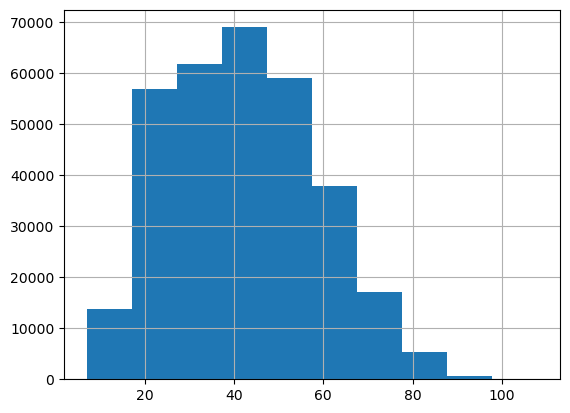

In [3]:
data_no_null_age = data[data.Age > 0]

data_no_null_age.Age.hist()

In [4]:
def setAgeGroup(age):
    if (age < 18):
        return "<18"
    elif (age < 25):
        return "18-24"
    elif (age < 35):
        return "25-34"
    elif (age < 45):
        return "35-44"
    elif (age < 55):
        return "45-54"
    elif (age < 65):
        return "55-64"
    elif (age >= 65):
        return "65+"

data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))

data_no_null_age

/var/folders/xk/szpk8xz97nd6f13z_h3dxwvw0000gn/T/ipykernel_10210/1456086913.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


In [5]:
data_sorted = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").mean()
data_sorted["CTR"] = data_sorted.Clicks / data_sorted.Impressions
data_sorted

,Age,Impressions,Clicks,CTR
AgeGroup,,,,
18-24,20.833317,5.002826,0.053251,0.010644
25-34,29.503352,4.993829,0.050486,0.010110
35-44,39.494680,5.021507,0.051679,0.010292
45-54,49.492580,5.010406,0.050274,0.010034
55-64,59.498189,5.022308,0.101837,0.020277
65+,72.988697,5.012347,0.151289,0.030183
<18,15.262149,5.007159,0.149335,0.029824


<AxesSubplot:xlabel='AgeGroup', ylabel='CTR value'>

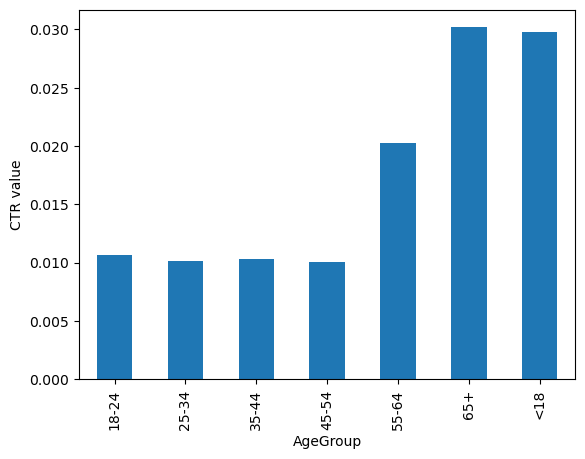

In [6]:
data_sorted.CTR.plot(kind="bar", ylabel = "CTR value")

<AxesSubplot:xlabel='Gender', ylabel='amount of people'>

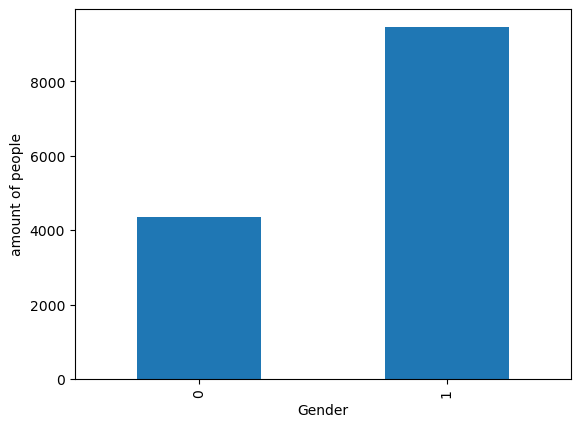

In [7]:
data_teen_genders = data_no_null_age.loc[data_no_null_age["AgeGroup"] == "<18"].groupby("Gender").count()
data_teen_genders.AgeGroup.plot(kind="bar", ylabel = "amount of people")

<AxesSubplot:xlabel='Gender', ylabel='CTR value'>

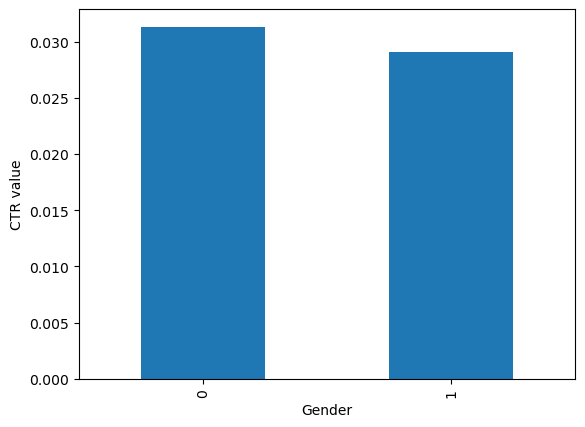

In [8]:
data_teen_genders = data_no_null_age.loc[data_no_null_age["AgeGroup"] == "<18"].groupby("Gender")
CTR_teen = data_teen_genders.Clicks.sum() / data_teen_genders.Impressions.sum()
CTR_teen.plot(kind="bar", ylabel = "CTR value")
        

<AxesSubplot:xlabel='Gender', ylabel='Impressions mean'>

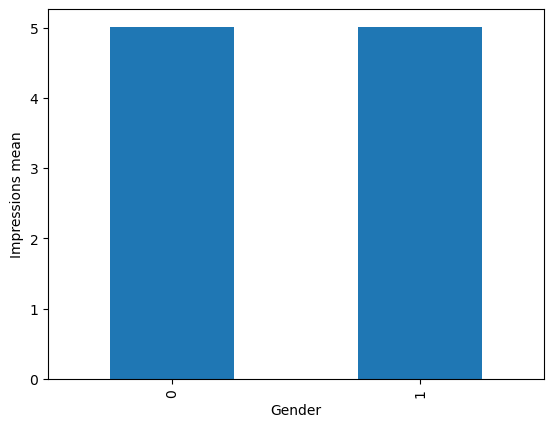

In [9]:
data_teen_genders.Impressions.mean().plot(kind="bar", ylabel = "Impressions mean")

<AxesSubplot:xlabel='Gender', ylabel='Impressions median'>

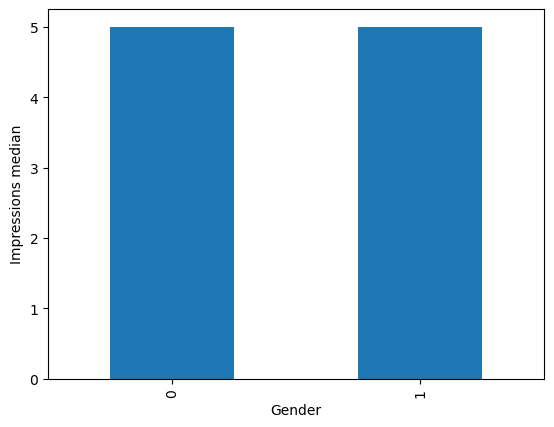

In [10]:
data_teen_genders.Impressions.median().plot(kind="bar", ylabel = "Impressions median")

<AxesSubplot:xlabel='Gender', ylabel='Impressions dispersion'>

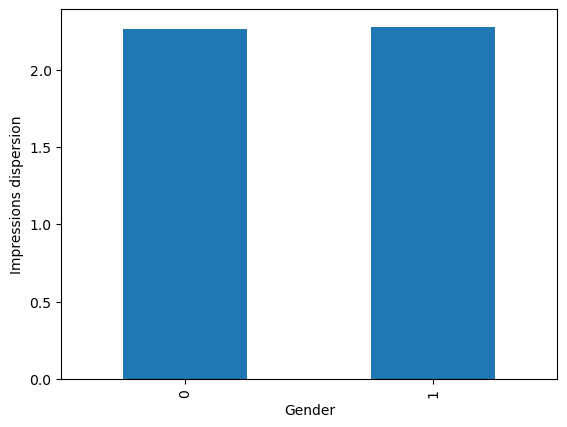

In [11]:
data_teen_genders.Impressions.std().plot(kind="bar", ylabel = "Impressions dispersion")



<AxesSubplot:xlabel='Gender', ylabel='Impressions maximum'>

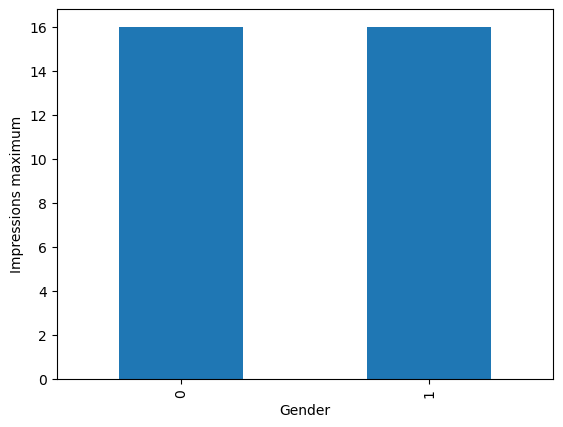

In [12]:
data_teen_genders.Impressions.max().plot(kind="bar", ylabel = "Impressions maximum")

In [13]:
final_data_frame = data_sorted.Impressions.to_frame()
final_data_frame.rename(columns={"Impressions": "Mean Impressions"}, inplace=True)
final_data_frame["CTR"] = data_sorted["CTR"]
final_data_frame["Impressions quantile"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.quantile(0.7)
final_data_frame["Median Impressions"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.median()
final_data_frame["Max Impressions"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.max()
final_data_frame["Dispersion Impressions"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Impressions.std()
final_data_frame["Dispersion Clicks"] = data_no_null_age[["Age", "Impressions", "Clicks", "AgeGroup"]].groupby("AgeGroup").Clicks.std()
final_data_frame

,Mean Impressions,CTR,Impressions quantile,Median Impressions,Max Impressions,Dispersion Impressions,Dispersion Clicks
AgeGroup,,,,,,,
18-24,5.002826,0.010644,6.0,5.0,17,2.244950,0.231010
25-34,4.993829,0.010110,6.0,5.0,17,2.226877,0.224147
35-44,5.021507,0.010292,6.0,5.0,20,2.237829,0.225861
45-54,5.010406,0.010034,6.0,5.0,17,2.240790,0.225034
55-64,5.022308,0.020277,6.0,5.0,16,2.230206,0.318704
65+,5.012347,0.030183,6.0,5.0,16,2.249162,0.384373
<18,5.007159,0.029824,6.0,5.0,16,2.271897,0.383411
